In [26]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import scipy
import matplotlib.pyplot as plt

In [170]:
X = scipy.sparse.load_npz("../data/artist_user_mtrx.npz")
X = np.array(X.todense())[4:34,:500]

pca = PCA(n_components=3)
pca.fit(X)
PCA(n_components=3)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

X_pca = pca.fit_transform(X)

[0.10573241 0.07730672 0.06211291]
[4.61930904 3.9498588  3.54049428]


In [171]:
import pickle
with open('../datasources/idx_to_artist.pkl', 'rb') as f:
    idx_to_artist = pickle.load(f)
    
top_20 = [idx_to_artist[i] for i in range(4, len(X))]

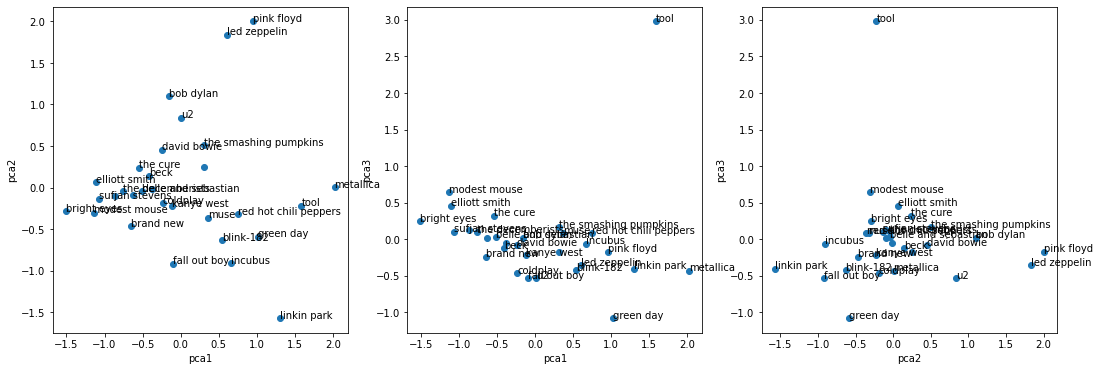

In [172]:
pca_1 = X_pca[:,0]
pca_2 = X_pca[:,1]
pca_3 = X_pca[:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))

ax1.scatter(pca_1, pca_2)
for i, txt in enumerate(top_20):
    ax1.annotate(txt, (pca_1[i], pca_2[i]))
    ax1.set_xlabel('pca1')
    ax1.set_ylabel('pca2')    

ax2.scatter(pca_1, pca_3)
for i, txt in enumerate(top_20):
    ax2.annotate(txt, (pca_1[i], pca_3[i]))
    ax2.set_xlabel('pca1')
    ax2.set_ylabel('pca3')
    
ax3.scatter(pca_2, pca_3)
for i, txt in enumerate(top_20):
    ax3.annotate(txt, (pca_2[i], pca_3[i]))
    ax3.set_xlabel('pca2')
    ax3.set_ylabel('pca3')